In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = r'Datos\Train'
img_size = (160, 160)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255, #normalizacion
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

# datos Train
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Para clasificación multiclase
    subset='training'
)

# datos Val
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    r'Datos\Test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2369 images belonging to 3 classes.
Found 592 images belonging to 3 classes.
Found 1050 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

learning_rate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

In [9]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stopping, learning_rate]
)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 324ms/step - accuracy: 0.5458 - loss: 0.9289 - val_accuracy: 0.5895 - val_loss: 0.8477 - learning_rate: 0.0010
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 312ms/step - accuracy: 0.5579 - loss: 0.8826 - val_accuracy: 0.6453 - val_loss: 0.7640 - learning_rate: 0.0010
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 303ms/step - accuracy: 0.5762 - loss: 0.8397 - val_accuracy: 0.6588 - val_loss: 0.7382 - learning_rate: 0.0010
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 308ms/step - accuracy: 0.6047 - loss: 0.8217 - val_accuracy: 0.6301 - val_loss: 0.7383 - learning_rate: 0.0010
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 312ms/step - accuracy: 0.6182 - loss: 0.7908 - val_accuracy: 0.6791 - val_loss: 0.7174 - learning_rate: 0.0010
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 315ms/step - accuracy: 0.6276 - loss: 0.7844 - val_accuracy: 0.6622 - val_loss: 0.7383 - learning_rate: 0.0010
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 319ms/step - accuracy: 0.6285 - loss: 0.

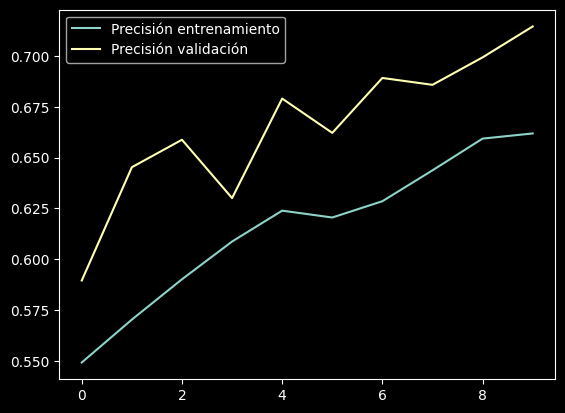

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.legend()
plt.show()

In [ ]:
# test
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Precisión en test: {test_accuracy * 100:.2f}%")
print(f"Pérdida en test: {test_loss:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6386 - loss: 1.5005
Precisión en test: 54.10%
Pérdida en test: 1.2184


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
Matriz de confusión:

Reporte de clasificación:
              precision    recall  f1-score   support

 Keratoconus       0.71      0.65      0.68       350
      Normal       0.48      0.79      0.60       350
     Suspect       0.43      0.18      0.26       350

    accuracy                           0.54      1050
   macro avg       0.54      0.54      0.51      1050
weighted avg       0.54      0.54      0.51      1050



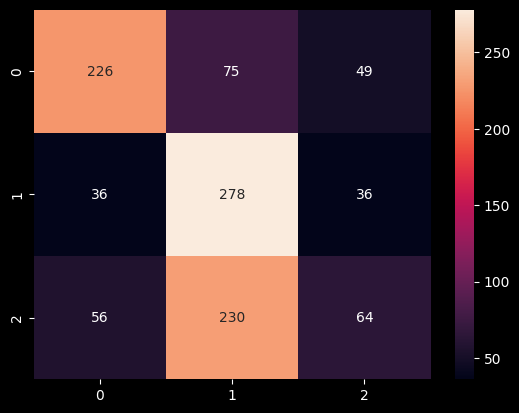

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

test_generator.reset()
y_true = test_generator.classes
y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred_classes = np.argmax(y_pred, axis=1)

print("Matriz de confusión:")
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot = True, fmt = 'g')

print("\nReporte de clasificación:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))